In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold

import time
import warnings
warnings.filterwarnings('ignore')


In [3]:
dF = pd.read_excel('CreditCard.xls').set_index('Unnamed: 0')
dF.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [4]:
dF.iloc[0]

X1                      LIMIT_BAL
X2                            SEX
X3                      EDUCATION
X4                       MARRIAGE
X5                            AGE
X6                          PAY_0
X7                          PAY_2
X8                          PAY_3
X9                          PAY_4
X10                         PAY_5
X11                         PAY_6
X12                     BILL_AMT1
X13                     BILL_AMT2
X14                     BILL_AMT3
X15                     BILL_AMT4
X16                     BILL_AMT5
X17                     BILL_AMT6
X18                      PAY_AMT1
X19                      PAY_AMT2
X20                      PAY_AMT3
X21                      PAY_AMT4
X22                      PAY_AMT5
X23                      PAY_AMT6
Y      default payment next month
Name: ID, dtype: object

In [5]:
new_header = dF.iloc[0] #grab the first row for the header
df = dF[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.reset_index(inplace=True)

In [7]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Defining Problem 
Banyak nasabah/customer di perusahaan tertentu ini yang tidak mampu membayar tagihan kartu kreditnya setelah beberapa waktu menggunakan kartu kredit.

### Goal
Membuat model ML untuk memprediksi apakah customer/nasabah mampu membayar tagihan kartu kredit untuk bulan depan. Nasabah yang terdeteksi akan default bulan depan akan dicut penggunaan kartu kreditnya sehingga dapat mengurangi kerugian perusahaan. 

#### Describe Data and Handling Missing Values

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  object
 1   SEX                         30000 non-null  object
 2   EDUCATION                   30000 non-null  object
 3   MARRIAGE                    30000 non-null  object
 4   AGE                         30000 non-null  object
 5   PAY_0                       30000 non-null  object
 6   PAY_2                       30000 non-null  object
 7   PAY_3                       30000 non-null  object
 8   PAY_4                       30000 non-null  object
 9   PAY_5                       30000 non-null  object
 10  PAY_6                       30000 non-null  object
 11  BILL_AMT1                   30000 non-null  object
 12  BILL_AMT2                   30000 non-null  object
 13  BILL_AMT3                   30000 non-null  ob

In [29]:
df.isna().sum() 

ID
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### Catatan:
- Tidak ada missing value
- Semua kolom memiliki tipe data object. Kolom yang sebenarnya numerik perlu diubah tipe datanya.
- Kolom kategorik 'SEX', 'EDUCATION', 'MARRIAGE'.

#### Describe Categorical Columns

In [10]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

ID,SEX,EDUCATION,MARRIAGE
count,30000,30000,30000
unique,2,7,4
top,2,2,2
freq,18112,14030,15964


In [11]:
df = df.apply(pd.to_numeric)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

#### Describe Numerical Columns

In [13]:
df[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']].describe()

ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


#### Pengecekan Imbalance Data

In [14]:
df['default payment next month'].value_counts() # Imbalanced data set

0    23364
1     6636
Name: default payment next month, dtype: int64

In [15]:
df['default payment next month'].value_counts(normalize=True)*100

0    77.88
1    22.12
Name: default payment next month, dtype: float64

Catatan :
- Data Imbalance

#### Analisis dan Visualisasi Data

Kita akan melihat apakah kita mungkin dapat melakukan binning nantinya pada kolom `Pay_0`, $\dots$, `PAY_6`, dengan melakukan analisis univariat:

In [25]:
pd.crosstab(index = df['PAY_0'], columns = df['default payment next month'], values=df['default payment next month'], aggfunc='count')


default payment next month,0,1
PAY_0,,
-2,2394,365
-1,4732,954
0,12849,1888
1,2436,1252
2,823,1844
3,78,244
4,24,52
5,13,13
6,5,6


In [26]:
 pd.crosstab(index = df['PAY_2'], columns = df['default payment next month'], values=df['default payment next month'], aggfunc='count')

default payment next month,0,1
PAY_2,,
-2,3091.0,691.0
-1,5084.0,966.0
0,13227.0,2503.0
1,23.0,5.0
2,1743.0,2184.0
3,125.0,201.0
4,49.0,50.0
5,10.0,15.0
6,3.0,9.0


##### Catatan:
Kolom-kolom `Pay_0`, $\dots$, `PAY_6` dapat dilakukan binning nantinya jika perlu. Nilai PAY_0 atau PAY_2 rentang 4-8 dapat di binning menjadi satu kelompok.

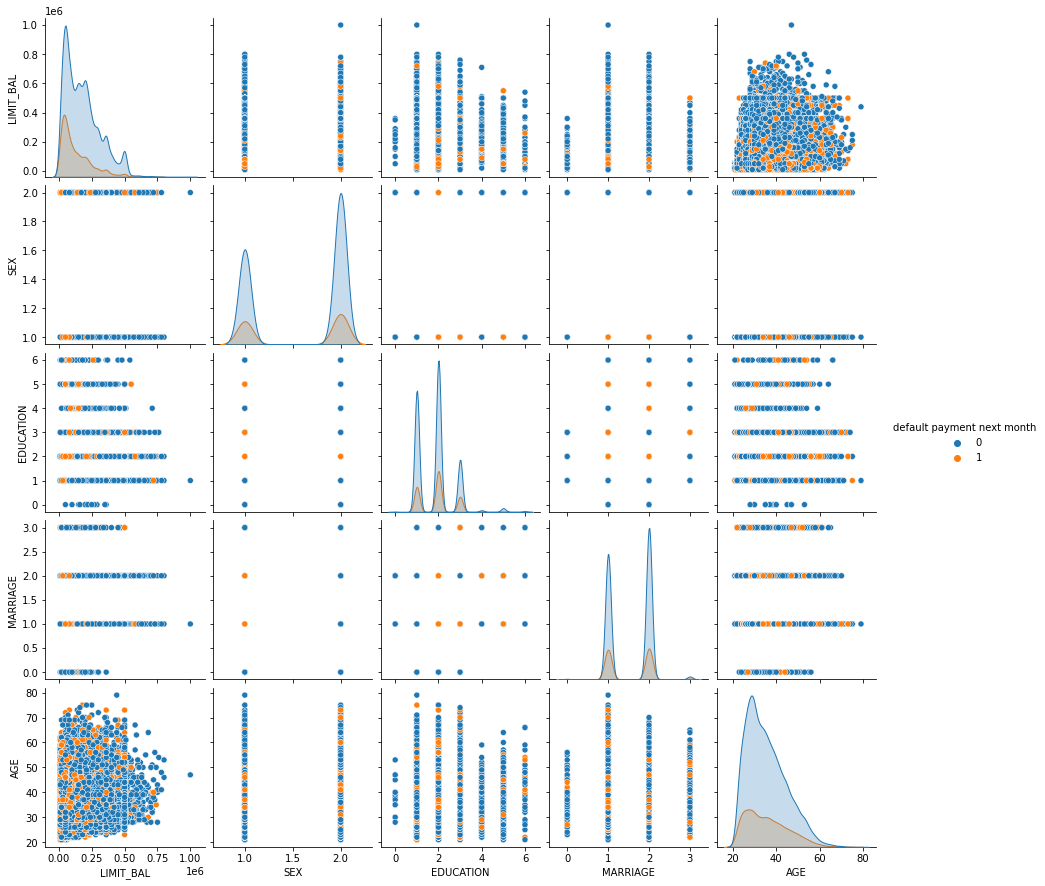

In [21]:
sns.pairplot(df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'default payment next month']], hue='default payment next month')

##### Catatan :
Kita lihat bahwa untuk setiap kolom non-diagonal dari tabel plot di atas, jenis default payment tidak terpisah dengan baik. Jadi kita mungkin akan mendapatkan akurasi yang buruk dalam hasil klasifiskasi nanti.

Text(0, 0.5, 'Feature magnitude')

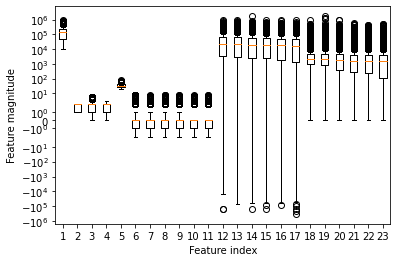

In [22]:
# Let's see the orders of magnitude of the features
plt.boxplot(df.drop(columns='default payment next month'))
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### Catatan :
Orde nilai fitur-fitur cukup berbeda jauh. Kita akan lakukan scaling saat preprocessing data nanti.

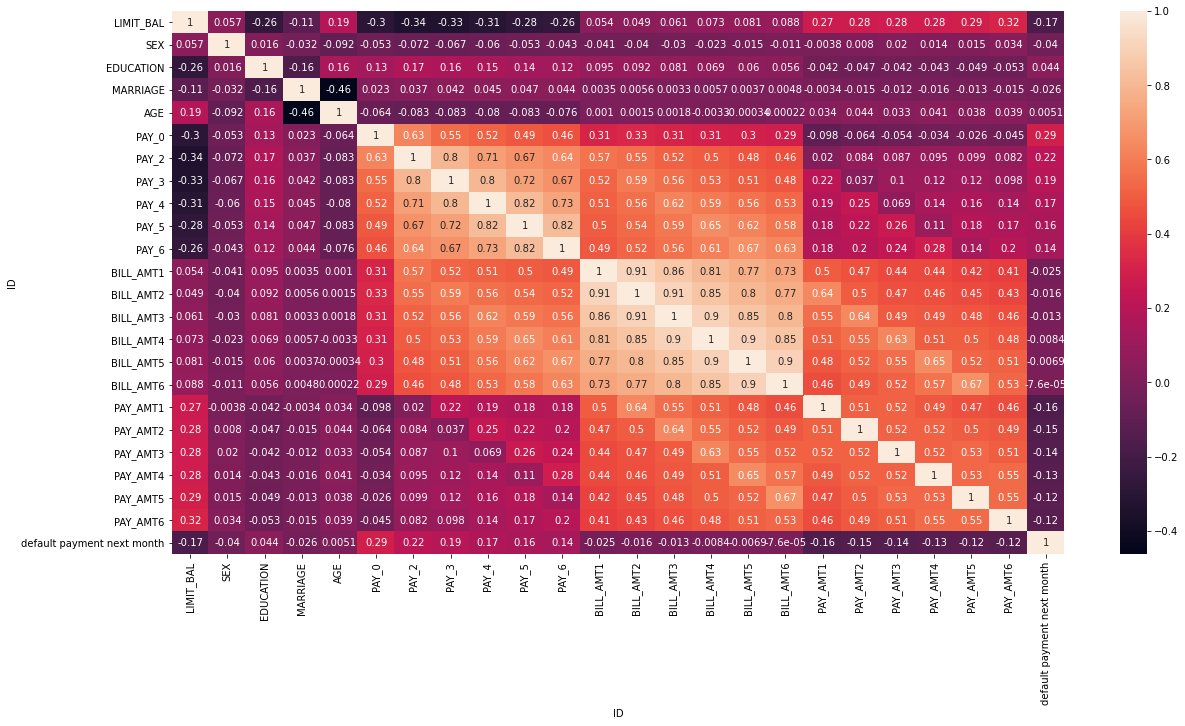

In [23]:
# Correlation Matrix
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(method='spearman'), annot=True, )
plt.show()

Dapat dilakukan feature selection berdasarkan tabel korelasi ini jika perlu nantinya.

### Base Model 1 : SVM with Scaling

In [24]:
df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Training Base Model 1

In [251]:
# SVM with Scaling
dS = df.copy()

cat_ftrs = ['SEX', 'EDUCATION', 'MARRIAGE']
num_ftrs = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
           ]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([
    ("Scaling", RobustScaler(), num_ftrs), 
    ("one_hot", OneHotEncoder(sparse=False), cat_ftrs) 
    ]) 

X = dS.drop(columns=['default payment next month'])
y = dS['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

from sklearn.svm import SVC
svc = SVC(class_weight={0 : 0.15, 1 : 0.85})
svc.fit(X_train_trans,y_train)

print("Feature Size before transformation :",X_train.shape)
print("Feature Size after transformation :",X_train_trans.shape, "\n")

print("SVM score with Scaling")
print("Accuracy on Training set : ",svc.score(X_train_trans, y_train))
print("Accuracy on Test     set : ",svc.score(X_test_trans, y_test))

Feature Size before transformation : (22500, 23)
Feature Size after transformation : (22500, 33) 

SVM score with Scaling
Accuracy on Training set :  0.5444888888888889
Accuracy on Test     set :  0.5334666666666666


#### Evaluation Matrix for Base Model 1

In [252]:
#### Evaluation Matrix for SVM

# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# # For short evaluation use this one :
# y_pred_train = dtree.predict(X_train_trans)
# y_pred_test = dtree.predict(X_test_trans)
# print(accuracy_score(y_train, y_pred_train))
# print(accuracy_score(y_test, y_pred_test))

## For Complete evaluation matrix :
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, f1

Acc_train, Rec_train, Prec_train, f1_train = Eva_Matrix(svc, X_train_trans, y_train)
Acc_test, Rec_test, Prec_test, f1_test = Eva_Matrix(svc, X_test_trans, y_test)
data_eval = {
    "Train" : [Acc_train, Rec_train, Prec_train, f1_train],
    "Test" : [Acc_test, Rec_test, Prec_test, f1_test]
}
pd.DataFrame(data= data_eval, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,Train,Test
Accuracy,0.544489,0.533467
Recall,0.850311,0.844485
Precision,0.308096,0.301810
F1,0.452306,0.444691


#### Classification Report and Confusion Matrix for Base Model 1

[[2600 3241]
 [ 258 1401]]


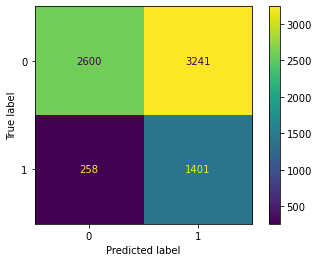

In [253]:
# from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
y_pred_test = svc.predict(X_test_trans)
print(confusion_matrix(y_test,y_pred_test))
plot_confusion_matrix(svc,X_test_trans,y_test)

In [254]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.45      0.60      5841
           1       0.30      0.84      0.44      1659

    accuracy                           0.53      7500
   macro avg       0.61      0.64      0.52      7500
weighted avg       0.78      0.53      0.56      7500



### Hasil Evaluation Matrix Base Model dan Penentuan Fokus Metrics
Sebelum menambahkan parameter class_wight, kita dapatkan akurasi yang cukup bagus (0.8) tetapi dengan nilai recall yang rendah (0.3). Dataset ini adalah dataset yang imblance dengan kelas positif (`1`) memiliki presentase yang sangat kecil. Kita akan memfokuskan analisa pada kelas minoritas ini karena dalam penggunaan kartu kredit, customer yang sebenarnya akan default tetapi ditebak/diklasifikasikan tidak default (FN) adalah yang akan menyumbangkan kerugian pada perusahaan. Sehingga kita akan mencoba menghindari (mengecilkan) nilai False Negatif ini.

Setelah kita menambahkan parameter class weight, kita peroleh nilai recall yang baik, yaitu 0.8, tetapi dengan trade-off nilai akurasi yang buruk. Tujuan kita dalam improvement model ini nanti adalah dengan mempertahankan nilai recall di atas sekaligus meningkatkan nilai akurasi.

### Base Model 2 : Logistic Regression with Scaling

In [39]:
# Logistic Regression with Scaling
dL = df.copy()


cat_ftrs = ['SEX', 'EDUCATION', 'MARRIAGE']
num_ftrs = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
           ]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer([
    ("Scaling", RobustScaler(), num_ftrs), 
    ("one_hot", OneHotEncoder(sparse=False), cat_ftrs) 
    ]) 

X = dL.drop(columns=['default payment next month'])
y = dL['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

# ########################################################
# # Adding Poly Features
# poly = PolynomialFeatures(degree=3).fit(X_train_trans)
# X_train_trans_poly = poly.transform(X_train_trans)
# X_test_trans_poly = poly.transform(X_test_trans)
# print("X_train_trans.shape : ", X_train_trans.shape)
# print("X_train_trans_poly.shape : ", X_train_trans_poly.shape)
# #################################################################


# from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight={0 : 0.2, 1 : 0.8})
logreg.fit(X_train_trans, y_train)

print("Logistic Regression Model score (with Scaling) :")
print("Accuracy on Training set : ",logreg.score(X_train_trans, y_train))
print("Accuracy on Test     set : ",logreg.score(X_test_trans, y_test))

Logistic Regression Model score (with Scaling) :
Accuracy on Training set :  0.6196888888888888
Accuracy on Test     set :  0.6086666666666667


#### Evaluation Matrix for Base Model 2

In [40]:
#### Evaluation Matrix for Logistic Regression

# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## For Complete evaluation matrix :
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, f1

Acc_train, Rec_train, Prec_train, f1_train = Eva_Matrix(logreg, X_train_trans, y_train)
Acc_test, Rec_test, Prec_test, f1_test = Eva_Matrix(logreg, X_test_trans, y_test)
data_eval = {
    "Train" : [Acc_train, Rec_train, Prec_train, f1_train],
    "Test" : [Acc_test, Rec_test, Prec_test, f1_test]
}
pd.DataFrame(data= data_eval, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,Train,Test
Accuracy,0.619689,0.608667
Recall,0.712879,0.702833
Precision,0.332334,0.323171
F1,0.453332,0.442757


#### Classification Report and Confusion Matrix for Base Model 2

[[3399 2442]
 [ 493 1166]]


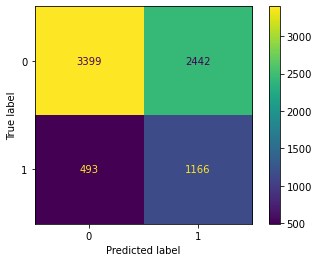

In [177]:
# from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
y_pred_test = logreg.predict(X_test_trans)
print(confusion_matrix(y_test,y_pred_test))
plot_confusion_matrix(logreg,X_test_trans,y_test)

In [178]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.58      0.70      5841
           1       0.32      0.70      0.44      1659

    accuracy                           0.61      7500
   macro avg       0.60      0.64      0.57      7500
weighted avg       0.75      0.61      0.64      7500



#### Evaluasi Nilai Recall dan Akurasi untuk Base Model 2
- Nilai recall $0.7$ (lebih kecil dari base model 1), tetapi dengan nilai akurasi yang lebih baik yaitu $0.6$.

### Base Model 3 : Random Forests

In [51]:
# Random Forests
dR = df.copy()

cat_ftrs = ['SEX', 'EDUCATION', 'MARRIAGE']
num_ftrs = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
           ]

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    [
#         ("Scaling", StandardScaler() , num_ftrs), 
        ("one_hot", OneHotEncoder(sparse=False), cat_ftrs)], 
        remainder='passthrough'
) 

X = dR.drop(columns=['default payment next month'])
y = dR['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

print("Feature Size before transformation :",X_train.shape)
print("Feature Size before transformation :",X_train_trans.shape, "\n")

# ########################################################
# # Adding Poly Features
# poly = PolynomialFeatures(degree=3).fit(X_train_trans)
# X_train_trans_poly = poly.transform(X_train_trans)
# X_test_trans_poly = poly.transform(X_test_trans)
# print("X_train_trans.shape : ", X_train_trans.shape)
# print("X_train_trans_poly.shape : ", X_train_trans_poly.shape)
# #################################################################


# from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=27, class_weight={0 : 0.01, 1 : 0.99})
rfc.fit(X_train_trans, y_train)

## Quick Evaluation
print("Decision Tree Model (default param) score) :")
print("Accuracy on Training set : ",rfc.score(X_train_trans, y_train))
print("Accuracy on Test     set : ",rfc.score(X_test_trans, y_test))

Feature Size before transformation : (22500, 23)
Feature Size before transformation : (22500, 33) 

Decision Tree Model (default param) score) :
Accuracy on Training set :  0.7047555555555556
Accuracy on Test     set :  0.5833333333333334


#### Evaluation Matrix for Base Model 3

In [52]:
#### Evaluation Matrix for Random Forests

# from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## For Complete evaluation matrix :
def Eva_Matrix(Model, X, y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true, y_pred)
    Rec = recall_score(y_true, y_pred)
    Prec = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return Acc, Rec, Prec, f1

Acc_train, Rec_train, Prec_train, f1_train = Eva_Matrix(rfc, X_train_trans, y_train)
Acc_test, Rec_test, Prec_test, f1_test = Eva_Matrix(rfc, X_test_trans, y_test)
data_eval = {
    "Train" : [Acc_train, Rec_train, Prec_train, f1_train],
    "Test" : [Acc_test, Rec_test, Prec_test, f1_test]
}
pd.DataFrame(data= data_eval, index = ['Accuracy', 'Recall', 'Precision', 'F1'])

,Train,Test
Accuracy,0.704756,0.583333
Recall,1.000000,0.737191
Precision,0.428313,0.312628
F1,0.599747,0.439059


#### Classification Report and Confusion Matrix for Base Model 3

[[3152 2689]
 [ 436 1223]]


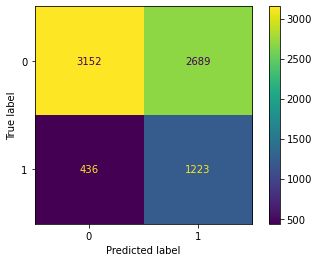

In [53]:
# from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
y_pred_test = rfc.predict(X_test_trans)
print(confusion_matrix(y_test,y_pred_test))
plot_confusion_matrix(rfc,X_test_trans,y_test)

In [54]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.54      0.67      5841
           1       0.31      0.74      0.44      1659

    accuracy                           0.58      7500
   macro avg       0.60      0.64      0.55      7500
weighted avg       0.75      0.58      0.62      7500



#### Evaluasi Nilai Recall dan Akurasi untuk Base Model 3
- Nilai recall $0.73$ tetapi dengan nilai akurasi yang paling baik yaitu $0.58$.
- Sangat sulit untuk menigkatkan nilai recall untuk model ini, perubahan bobot kelas sangat kecil pengaruhnya terhadapt nilai recall. 

### Hyperparameter Tuning with GridCV for Random Forests

In [56]:
# Random Forests
dR = df.copy()

cat_ftrs = ['SEX', 'EDUCATION', 'MARRIAGE']
num_ftrs = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
           ]


# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    [
#         ("Scaling", StandardScaler() , num_ftrs), 
        ("one_hot", OneHotEncoder(sparse=False), cat_ftrs)], 
        remainder='passthrough'
) 

X = dR.drop(columns=['default payment next month'])
y = dR['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

print("Feature Size before transformation :",X_train.shape)
print("Feature Size before transformation :",X_train_trans.shape, "\n")


# from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# help(RandomForestClassifier)
# from sklearn.model_selection import GridSearchCV
n_estimators = [64, 100, 128, 200]
max_features = [5, 10, 15, 20]
bootstrap = [True, False]
# max_depth = [10, 20, 25, 30, 35, 40]

param_grid = {'n_estimators' : n_estimators, 
             'max_features' : max_features,
             'bootstrap' : bootstrap,
#               'max_depth' : max_depth
             }
skf = StratifiedKFold(n_splits=3)
grid = GridSearchCV(rfc, param_grid, cv=skf, n_jobs=-1, verbose=1, scoring='recall')
grid.fit(X_train_trans, y_train)

Feature Size before transformation : (22500, 23)
Feature Size before transformation : (22500, 33) 

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:  5.2min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [5, 10, 15, 20],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='recall', verbose=1)

In [57]:
grid.best_params_

{'bootstrap': True, 'max_features': 15, 'n_estimators': 64}

In [58]:
rfc_tuned = grid.best_estimator_

rfc_tuned.fit(X_train_trans,y_train)
y_pred = rfc_tuned.predict(X_test_trans)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5841
           1       0.64      0.37      0.47      1659

    accuracy                           0.81      7500
   macro avg       0.74      0.65      0.68      7500
weighted avg       0.80      0.81      0.79      7500



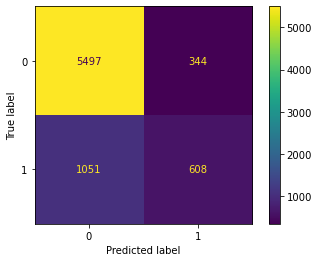

In [59]:
plot_confusion_matrix(rfc_tuned,X_test_trans,y_test)

### Hyperparameter Tuning with GridCV for Logistic Regression

In [243]:
dL = df.copy()

cat_ftrs = ['SEX', 'EDUCATION', 'MARRIAGE']
num_ftrs = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
           ]


# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    [
#         ("Scaling", StandardScaler() , num_ftrs), 
        ("one_hot", OneHotEncoder(sparse=False), cat_ftrs)], 
        remainder='passthrough'
) 

X = dL.drop(columns=['default payment next month'])
y = dL['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
X_test_trans = ct.transform(X_test)

print("Feature Size before transformation :",X_train.shape)
print("Feature Size before transformation :",X_train_trans.shape, "\n")

logreg = LogisticRegression()

# from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100]


param_grid = {'penalty' : penalty,
              'C' : C,
             'class_weight': [{0 : 0.179, 1 : 0.821}]
             }
skf = StratifiedKFold(n_splits=3)
grid = GridSearchCV(logreg, param_grid, cv=skf, n_jobs=-1, verbose=1, scoring='accuracy')
grid.fit(X_train_trans, y_train)

Feature Size before transformation : (22500, 23)
Feature Size before transformation : (22500, 33) 

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    2.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 20, 50, 100],
                         'class_weight': [{0: 0.179, 1: 0.821}],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy', verbose=1)

In [244]:
grid.best_params_

{'C': 20, 'class_weight': {0: 0.179, 1: 0.821}, 'penalty': 'l2'}

In [245]:
# rfc_tuned = RandomForestClassifier(bootstrap= True, max_features = 10, n_estimators= 64)
logreg_tuned = grid.best_estimator_

logreg_tuned.fit(X_train_trans,y_train)
y_pred = logreg_tuned.predict(X_test_trans)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.34      0.49      5841
           1       0.26      0.84      0.40      1659

    accuracy                           0.45      7500
   macro avg       0.57      0.59      0.45      7500
weighted avg       0.74      0.45      0.47      7500



### Hyperparameter Tuning with GridCV for SVM (Tidak selesai/lama waktu run)

In [ ]:
# dS = df.copy()

# cat_ftrs = ['SEX', 'EDUCATION', 'MARRIAGE']
# num_ftrs = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2',
#        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
#        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
#        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
#            ]


# # from sklearn.compose import ColumnTransformer
# # from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(
#     [
# #         ("Scaling", StandardScaler() , num_ftrs), 
#         ("one_hot", OneHotEncoder(sparse=False), cat_ftrs)], 
#         remainder='passthrough'
# ) 

# X = dS.drop(columns=['default payment next month'])
# y = dS['default payment next month']
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

# ct.fit(X_train)
# X_train_trans = ct.transform(X_train)
# X_test_trans = ct.transform(X_test)

# print("Feature Size before transformation :",X_train.shape)
# print("Feature Size before transformation :",X_train_trans.shape, "\n")

# svc = SVC()

# # from sklearn.model_selection import GridSearchCV
# C = [0.01, 0.1, 0.5, 1, 5, 10]
# kernel = ['linear', 'poly', 'rbf']
# gamma = ['scale', 'auto'] 

# param_grid = {'gamma' : gamma,
#               'C' : C,
#               'kernel' : kernel,
#              'class_weight': [{0 : 0.15, 1 : 0.85}]
#              }
# skf = StratifiedKFold(n_splits=3)
# grid = GridSearchCV(svc, param_grid, cv=skf, n_jobs=-1, verbose=1, scoring='accuracy')
# grid.fit(X_train_trans, y_train)

Feature Size before transformation : (22500, 23)
Feature Size before transformation : (22500, 33) 

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


#### Kesimpulan dan Saran

Dari ketiga model dan versi tuningnya di atas$^*$, kita dapat mengambil model base model 2 (Logistic regression) sebagai model yang paling ideal untuk kasus klasifikasi ini. Model ini tidak overfit, memiliki akurasi yang masuk akal untuk kasus ini, $0.6$, dan dengan recall yang cukup tinggi yaitu $0.7$. Perlu dipelajari lebih lanjut lagi untuk versi tuning nya masing-masing karena mungkin aja ada model versi tuning yang dapat memiliki akurasi dan recall yang lebih baik. Improvement lain yang dapat dicoba
- Fine tuning
- Random Over Sampling
- Mengubah threshold probabilitas
- Feature Engineering - Binning/Recategorize
- Mencoba algoritma lain